In [14]:
import sys
import pandas as pd
import shap
import sklearn
import warnings

print(f"Python version : {sys.version.split()[0]}")
print(f"Pandas version : {pd.__version__}")
print(f"Scikit-learn version : {sklearn.__version__}")
print(f"SHAP version : {shap.__version__}")
print("\nTout est installé correctement ! Prêt pour la mission TechNova.")

Python version : 3.11.14
Pandas version : 2.3.3
Scikit-learn version : 1.7.2
SHAP version : 0.50.0

Tout est installé correctement ! Prêt pour la mission TechNova.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration esthétique des graphiques
sns.set_theme(style="whitegrid")
# Option pour voir toutes les colonnes quand on affiche un dataframe
pd.set_option('display.max_columns', None)

print("Environnement chargé.")

Environnement chargé.


In [3]:
# Chargement des fichiers
try:
    df_sirh = pd.read_csv("extrait_sirh.csv")
    df_eval = pd.read_csv("extrait_eval.csv")
    df_sondage = pd.read_csv("extrait_sondage.csv")
    print(" Fichiers chargés.")
except FileNotFoundError:
    print(" Erreur : Vérifiez que les 3 fichiers CSV sont bien dans le dossier du projet.")

# Inspection rapide des dimensions et des colonnes
print(f"SIRH : {df_sirh.shape} (Lignes, Colonnes)")
print(f"Eval : {df_eval.shape}")
print(f"Sondage : {df_sondage.shape}")

# Affichons un exemple pour repérer les clés de jointure
print("\n--- Aperçu des clés ---")
print("SIRH (id_employee) :", df_sirh['id_employee'].head(3).values)
print("Eval (eval_number) :", df_eval['eval_number'].head(3).values)
print("Sondage (code_sondage) :", df_sondage['code_sondage'].head(3).values)

 Fichiers chargés.
SIRH : (1470, 12) (Lignes, Colonnes)
Eval : (1470, 10)
Sondage : (1470, 12)

--- Aperçu des clés ---
SIRH (id_employee) : [1 2 4]
Eval (eval_number) : ['E_1' 'E_2' 'E_4']
Sondage (code_sondage) : [1 2 4]


In [4]:
print("--- Résumé Statistique SIRH ---")
display(df_sirh.describe()) # Montre les moyennes, min, max, quartiles

print("\n--- Infos Structures Eval ---")
display(df_eval.info()) # Montre s'il y a des valeurs manquantes (null)

print("\n--- Infos Structures Sondage ---")
display(df_sondage.info())

--- Résumé Statistique SIRH ---


,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,6502.931293,2.693197,80.0,11.279592,7.008163,4.229252
std,602.024335,9.135373,4707.956783,2.498009,0.0,7.780782,6.126525,3.623137
min,1.000000,18.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2911.000000,1.000000,80.0,6.000000,3.000000,2.000000
50%,1020.500000,36.000000,4919.000000,2.000000,80.0,10.000000,5.000000,3.000000
75%,1555.750000,43.000000,8379.000000,4.000000,80.0,15.000000,9.000000,7.000000
max,2068.000000,60.000000,19999.000000,9.000000,80.0,40.000000,40.000000,18.000000



--- Infos Structures Eval ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: in

None


--- Infos Structures Sondage ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sou

None

In [5]:

def audit_variance_nulle(fichiers_a_verifier):
    print("AUDIT : Recherche des colonnes à valeur unique \n")
    
    for nom_logique, nom_fichier in fichiers_a_verifier.items():
        try:
            # Chargement
            df = pd.read_csv(nom_fichier)
            colonnes_suspectes = []
            
            # Analyse colonne par colonne
            for col in df.columns:
                # nunique() compte les valeurs uniques. Si = 1, c'est une constante.
                if df[col].nunique() == 1:
                    valeur_unique = df[col].unique()[0]
                    colonnes_suspectes.append((col, valeur_unique))
            
            # Rapport
            if colonnes_suspectes:
                print(f" Fichier {nom_logique.upper()} ({nom_fichier}) :")
                for col, val in colonnes_suspectes:
                    print(f"   Colonne '{col}' est constante. (Valeur partout = '{val}')")
            else:
                print(f"Fichier {nom_logique.upper()} : Aucune colonne constante.")
                
        except FileNotFoundError:
            print(f" Fichier introuvable : {nom_fichier}")
        
        print("-" * 40) # Séparateur

# --- CONFIGURATION ET LANCEMENT ---
liste_fichiers = {
    "SIRH": "extrait_sirh.csv",
    "Evaluation": "extrait_eval.csv",
    "Sondage": "extrait_sondage.csv"
}

audit_variance_nulle(liste_fichiers)

AUDIT : Recherche des colonnes à valeur unique 

 Fichier SIRH (extrait_sirh.csv) :
   Colonne 'nombre_heures_travailless' est constante. (Valeur partout = '80')
----------------------------------------
Fichier EVALUATION : Aucune colonne constante.
----------------------------------------
 Fichier SONDAGE (extrait_sondage.csv) :
   Colonne 'nombre_employee_sous_responsabilite' est constante. (Valeur partout = '1')
   Colonne 'ayant_enfants' est constante. (Valeur partout = 'Y')
----------------------------------------


In [6]:
# --- NETTOYAGE PRÉ-FUSION (Suppression du bruit) ---
print("\n---  Suppression des colonnes à variance nulle ---")

# Liste des colonnes identifiées par votre audit
cols_a_supprimer = {
    "SIRH": ["nombre_heures_travailless"],
    "SONDAGE": ["ayant_enfants", "nombre_employee_sous_responsabilite"]
}

# Suppression dans SIRH
for col in cols_a_supprimer["SIRH"]:
    if col in df_sirh.columns:
        df_sirh.drop(columns=[col], inplace=True)
        print(f"     SIRH : Colonne '{col}' supprimée.")

# Suppression dans SONDAGE
for col in cols_a_supprimer["SONDAGE"]:
    if col in df_sondage.columns:
        df_sondage.drop(columns=[col], inplace=True)
        print(f"     SONDAGE : Colonne '{col}' supprimée.")


---  Suppression des colonnes à variance nulle ---
     SIRH : Colonne 'nombre_heures_travailless' supprimée.
     SONDAGE : Colonne 'ayant_enfants' supprimée.
     SONDAGE : Colonne 'nombre_employee_sous_responsabilite' supprimée.


In [7]:
# Correction du format "Augmentation Salaire"
# On retire le '%' et on transforme en nombre entier
if df_eval['augementation_salaire_precedente'].dtype == 'object':
    df_eval['augementation_salaire_precedente'] = df_eval['augementation_salaire_precedente'].apply(
        lambda x: int(str(x).replace('%', ''))
    )
    print("Correction effectuée : Les % sont devenus des chiffres.")

Correction effectuée : Les % sont devenus des chiffres.


In [8]:
# --- ETAPE DE VALIDATION DES DONNÉES ---

# 1. Vérification des formats bruts
print("Format SIRH :", df_sirh['id_employee'].head(3).tolist())
print("Format Eval :", df_eval['eval_number'].head(3).tolist())

# 2. Test d'unicité (Est-ce qu'il y a des doublons ?)
print(f"Employés uniques SIRH : {df_sirh['id_employee'].nunique()}")
print(f"Employés uniques Eval : {df_eval['eval_number'].nunique()}")

# 3. Vérification de la correspondance
# On extrait temporairement les chiffres de Eval pour tester
test_ids_eval = df_eval['eval_number'].apply(lambda x: int(x.split('_')[1]))

# On regarde combien d'IDs sont communs avec le SIRH
ids_communs = set(df_sirh['id_employee']).intersection(set(test_ids_eval))
print(f"Nombre d'identifiants communs après nettoyage : {len(ids_communs)} / 1470")

if len(ids_communs) == 1470:
    print(" VALIDATION OK : Les fichiers correspondent parfaitement.")
else:
    print(" ATTENTION : Il y a des employés manquants.")

Format SIRH : [1, 2, 4]
Format Eval : ['E_1', 'E_2', 'E_4']
Employés uniques SIRH : 1470
Employés uniques Eval : 1470
Nombre d'identifiants communs après nettoyage : 1470 / 1470
 VALIDATION OK : Les fichiers correspondent parfaitement.


In [9]:
# 1. Nettoyage de la clé dans le fichier EVAL
# On crée une fonction simple qui sépare le texte "E_1" par le tiret et garde la 2ème partie
def extraire_id(valeur):
    return int(valeur.split('_')[1])

# Application avec .apply() comme demandé
df_eval['id_employee'] = df_eval['eval_number'].apply(extraire_id)

# 2. Renommage de la clé dans le fichier SONDAGE
# Pour que la fusion soit automatique, il faut le même nom de colonne partout
df_sondage = df_sondage.rename(columns={'code_sondage': 'id_employee'})

# 3. Vérification
print("Clés harmonisées.")
print("Eval ID corrigé :", df_eval['id_employee'].head(3).values)

Clés harmonisées.
Eval ID corrigé : [1 2 4]


In [10]:
# Fusion 1 : SIRH + EVAL
df_central = pd.merge(df_sirh, df_eval, on='id_employee', how='left')

# Fusion 2 : + SONDAGE
df_central = pd.merge(df_central, df_sondage, on='id_employee', how='left')

print(f"DataFrame Central créé. Dimensions finales : {df_central.shape}")
display(df_central.head())

DataFrame Central créé. Dimensions finales : (1470, 30)


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,8,6,4,2,3,2,4,1,1,E_1,3,Oui,11,Oui,0,0,1,2,Infra & Cloud,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,10,10,7,3,2,2,2,4,3,E_2,4,Non,23,Non,1,3,8,1,Infra & Cloud,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,7,0,0,4,2,1,3,2,3,E_4,3,Oui,15,Oui,0,3,2,2,Autre,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,8,8,7,4,3,1,3,3,3,E_5,3,Oui,11,Non,0,3,3,4,Infra & Cloud,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,6,2,2,1,3,1,2,4,3,E_7,3,Non,12,Non,1,3,2,1,Transformation Digitale,Occasionnel,2,2


In [11]:
# On identifie les colonnes numériques (Quantitative) et objets (Qualitative)
cols_quanti = df_central.select_dtypes(include=['int64', 'float64']).columns
cols_quali = df_central.select_dtypes(include=['object']).columns

print(f"Variables Quantitatives ({len(cols_quanti)}) : \n{list(cols_quanti)}")
print(f"\nVariables Qualitatives ({len(cols_quali)}) : \n{list(cols_quali)}")

# Création d'une colonne cible numérique (0 ou 1) pour les calculs statistiques
# La colonne 'a_quitte_l_entreprise' contient "Oui"/"Non" -> On la transforme
df_central['Attrition_Numerique'] = df_central['a_quitte_l_entreprise'].apply(lambda x: 1 if x == 'Oui' else 0)

Variables Quantitatives (21) : 
['id_employee', 'age', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'augementation_salaire_precedente', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']

Variables Qualitatives (9) : 
['genre', 'statut_marital', 'departement', 'poste', 'eval_number', 'heure_supplementaires', 'a_quitte_l_entreprise', 'domaine_etude', 'frequence_deplacement']


In [12]:
# Calcul des moyennes pour chaque groupe (Partis vs Restés)
# On utilise .T (transpose) pour que ce soit plus lisible à l'écran
stats_comparatives = df_central.groupby('a_quitte_l_entreprise')[cols_quanti].mean().T

print("--- Comparaison des moyennes : Qui part (Oui) vs Qui reste (Non) ---")
display(stats_comparatives)

--- Comparaison des moyennes : Qui part (Oui) vs Qui reste (Non) ---


a_quitte_l_entreprise,Non,Oui
id_employee,1027.656123,1010.345992
age,37.561233,33.607595
revenu_mensuel,6832.739659,4787.092827
nombre_experiences_precedentes,2.645580,2.940928
annee_experience_totale,11.862936,8.244726
annees_dans_l_entreprise,7.369019,5.130802
annees_dans_le_poste_actuel,4.484185,2.902954
satisfaction_employee_environnement,2.771290,2.464135
note_evaluation_precedente,2.770479,2.518987
niveau_hierarchique_poste,2.145985,1.637131


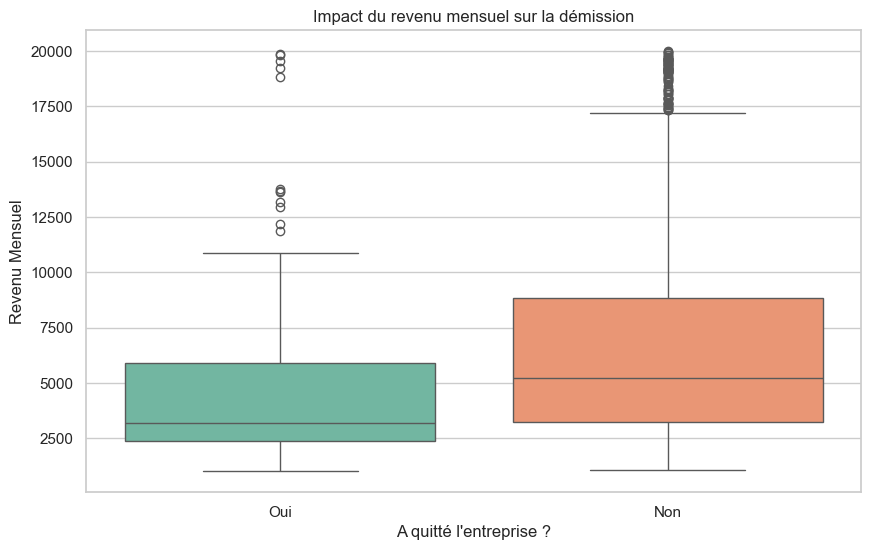

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='a_quitte_l_entreprise', y='revenu_mensuel', data=df_central, palette="Set2")
plt.title("Impact du revenu mensuel sur la démission")
plt.xlabel("A quitté l'entreprise ?")
plt.ylabel("Revenu Mensuel")
plt.show()
warnings.simplefilter(action='ignore', category=FutureWarning)

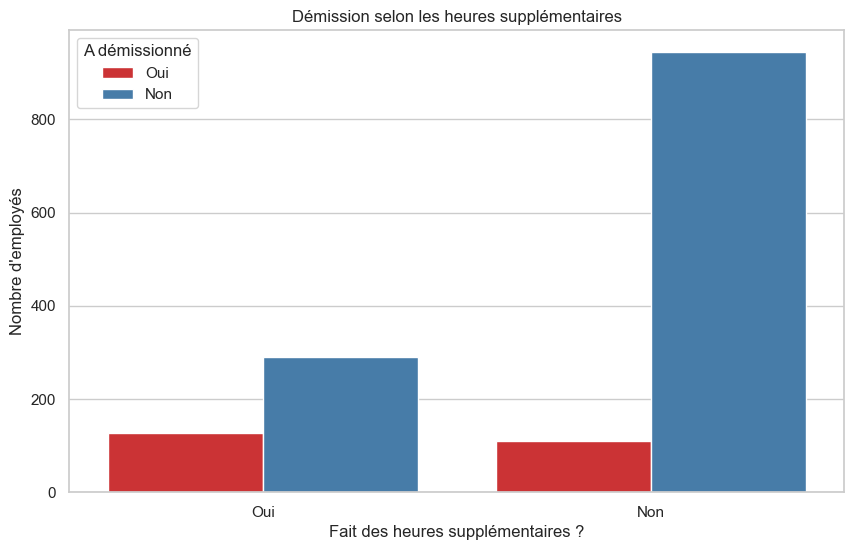

In [17]:
plt.figure(figsize=(10, 6))
# On regarde la proportion de départs chez ceux qui font des heures sup vs pas d'heures sup
sns.countplot(x='heure_supplementaires', hue='a_quitte_l_entreprise', data=df_central, palette="Set1")
plt.title("Démission selon les heures supplémentaires")
plt.xlabel("Fait des heures supplémentaires ?")
plt.ylabel("Nombre d'employés")
plt.legend(title='A démissionné')
plt.show()

In [18]:
# --- SAUVEGARDE FINALE ---
# On sauvegarde le résultat propre sans l'index (0, 1, 2...) qui ne sert à rien
df_central.to_csv("data_clean.csv", index=False)

print("Fichier 'data_clean.csv' sauvegardé avec succès !")
print("Vous pouvez fermer ce notebook et ouvrir le suivant.")

Fichier 'data_clean.csv' sauvegardé avec succès !
Vous pouvez fermer ce notebook et ouvrir le suivant.
